In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load iris dataset
iris = datasets.load_iris()

In [3]:
iris_frame = pd.DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [4]:
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
#splitting dataset into test and train randomly with given ratio
ratio = 0.7
msk = np.random.rand(len(iris_frame)) < ratio

train = iris_frame[msk]
train_x = train[train.columns[:-1]]
train_y = train[train.columns[-1]]

test = iris_frame[~msk]
test_x = test[test.columns[:-1]]
test_y = test[test.columns[-1]]

In [6]:
def get_class_for_instance(train, test_instance, k):
    """Return class of given instance in test dataset"""
    distances = []
    for index, row in train.iterrows():
        # calculate euclidean distance
        dist = np.linalg.norm(row[:-1]-test_instance)
        distances.append((dist, row[-1]))
    distances.sort()
    k_neighbours = distances[:k]
    classes = [int(item[1]) for item in k_neighbours]
    return max(set(classes), key=classes.count)

In [7]:
def predict(train, test, k):
    """Return list of predictions for test dataset"""
    predicts = []
    for index, row in test.iterrows():
        prediction = get_class_for_instance(train, row, k)
        predicts.append(prediction)
    return predicts

In [8]:
prediction = predict(train, test_x, 1)
print(prediction)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


# Comparing with sklearn

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_x, train_y)
sklearn_pred = knn.predict(test_x)

print('Number of distinct values: ', sum(np.abs(sklearn_pred-prediction)))

Number of distinct values:  0


# Accuracy

In [10]:
def accuracy(prediction, test_y):
    return 1 - sum(np.abs(prediction-test_y))/len(prediction)

In [11]:
print('Accuracy:', accuracy(prediction, test_y))

Accuracy: 0.931818181818


In [12]:
def scores(k_max = 10):
    """Return accuracies for k parameter in range k_max"""
    k_score=[]
    k_values = range(1, k_max+1, 2)
    for k in k_values:
        prediction = predict(train, test_x, k)
        score = accuracy(prediction, test_y)
        k_score.append(score)
    return list(k_values), k_score

k_values, k_scores = scores(30)

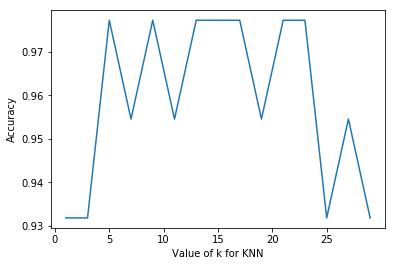

In [13]:
plt.plot(k_values, k_scores)
plt.xlabel('Value of k for KNN')
plt.xticks(np.arange(min(k_values)-1, max(k_values)+1, 5))
plt.ylabel('Accuracy')